In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
from yahoo_fin.stock_info import get_data

In [2]:
intc = get_data('INTC', start_date = "01/01/2021", end_date = "05/24/2021", index_as_date = False)

In [3]:
intc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      97 non-null     datetime64[ns]
 1   open      97 non-null     float64       
 2   high      97 non-null     float64       
 3   low       97 non-null     float64       
 4   close     97 non-null     float64       
 5   adjclose  97 non-null     float64       
 6   volume    97 non-null     int64         
 7   ticker    97 non-null     object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 6.2+ KB


In [4]:
intc.head()

,date,open,high,low,close,adjclose,volume,ticker
0,2021-01-04,49.889999,51.389999,49.400002,49.669998,49.068108,46102500,INTC
1,2021-01-05,49.450001,50.830002,49.330002,50.610001,49.996723,24866600,INTC
2,2021-01-06,50.439999,52.150002,50.200001,51.099998,50.480778,36809600,INTC
3,2021-01-07,51.490002,52.689999,51.299999,52.189999,51.557571,32092300,INTC
4,2021-01-08,52.450001,52.529999,51.270000,51.650002,51.024120,34625400,INTC


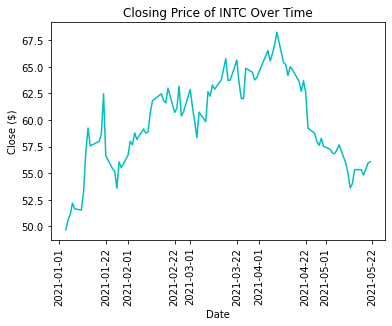

In [5]:
plt.plot(intc.date, intc.close, 'c')
plt.xlabel('Date')
plt.ylabel('Close ($)')
plt.title('Closing Price of INTC Over Time')
plt.xticks(rotation = 90)
plt.show()

In [6]:
#https://towardsdatascience.com/implementing-macd-in-python-cc9b2280126a
value1 = intc.close.ewm(span=12, adjust=False).mean()
value2 = intc.close.ewm(span=26, adjust=False).mean()
macd = value1-value2
value3 = macd.ewm(span=9, adjust = False).mean()

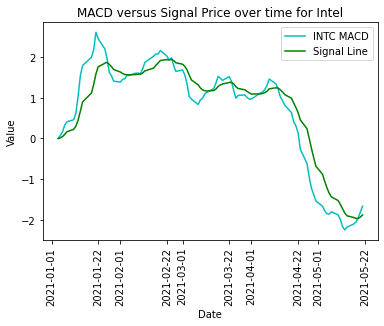

In [7]:
plt.plot(intc.date, macd, color = "c", label = "INTC MACD")
plt.plot(intc.date, value3, color = "g", label = "Signal Line")
plt.legend(loc = 'upper right')
plt.title('MACD versus Signal Price over time for Intel')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation = 90)
plt.show()

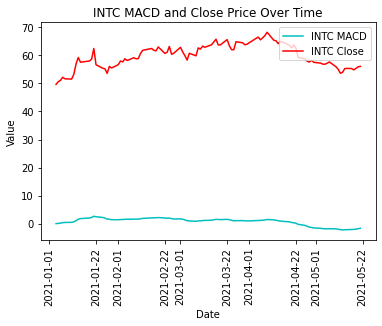

In [8]:
plt.plot(intc.date, macd, color = "c", label = "INTC MACD")
plt.plot(intc.date, intc.close, color = "r", label = "INTC Close")
plt.legend(loc = 'upper right')
plt.title('INTC MACD and Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation = 90)
plt.show()

In [9]:
intc['macd'] = macd
intc['signal'] = value3

In [10]:
intc['action'] = ""

In [11]:
#inspired by https://randerson112358.medium.com/determine-when-to-buy-sell-stock-edeeac03f9fb
count = 97
flag = -1
for i in range(0,97):
  if(intc['macd'][i] > intc['signal'][i]):
    if(flag != 1):
      intc['action'][i] = "Buy"
      flag = 1

    elif (intc['macd'][i] < intc['signal'][i]):
      if(flag != 0):
        intc['action'][i] = "Sell"
        flag = 0



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [12]:
intc['buy_price'] = ""
intc['sell_price'] = ""
buy_flag = False
sell_flag = False
for i in range(0,97):
  if(intc['action'][i] == "Buy"):
    intc['buy_price'][i] = intc['close'][i]
    buy_flag = True
  elif(intc['action'][i] == "Sell"):
    intc['sell_price'][i] = intc['close'][i]
    sell_flag = True
  else:
    intc['buy_price'][i] = np.nan
    intc['sell_price'][i] = np.nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


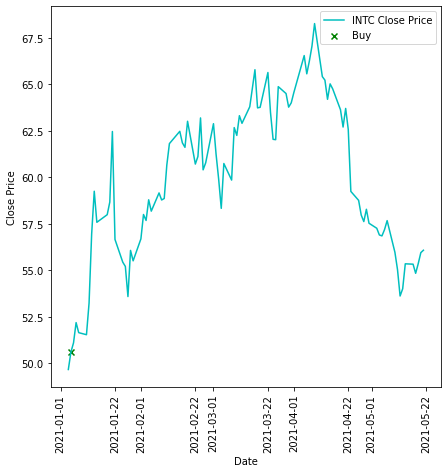

In [13]:
plt.figure(figsize=(7,7))
plt.plot(intc.date,intc.close, color = "c", label = "INTC Close Price")

if(buy_flag == True):
  plt.scatter(intc.date, intc.buy_price, marker = "x", color = "g", label = "Buy")

if(sell_flag == True):
  plt.scatter(intc.date, intc.sell_price, marker = "x", color = "r", label = "Sell")

plt.legend()
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation = 90)
plt.show()